# Results of different #agent values

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
results = pd.read_csv('./agents_results.csv')
results = results.drop_duplicates(subset='damage')
results = results.groupby(['planner','num_agents'], as_index=False).mean()
results.head()

,planner,num_agents,num_robots,d,completion_time,planner_time,damage,num_disabled
0,Additive100StaticLackPlanner,100,5.0,5.0,289.021946,0.060925,24519.685806,20.4
1,Additive100StaticLackPlanner,200,5.0,5.0,293.834245,0.105812,49414.423809,37.3
2,Additive100StaticLackPlanner,300,5.0,5.0,296.789991,0.193622,74075.000743,62.8
3,Additive100StaticLackPlanner,400,5.0,5.0,297.416235,0.394197,98762.277380,85.9
4,Additive100StaticLackPlanner,500,5.0,5.0,297.222438,0.576642,123461.156841,112.2


In [7]:
planners_names = ['IterativeAssignmentPlanner',
                  'KmeansAssignmentPlanner',
                  'StaticLineLackPlanner',
                  'SeparateStaticLackPlanner',
                  'Additive25StaticLackPlanner',
                  'Additive50StaticLackPlanner',
                  'Additive100StaticLackPlanner']

colors = ['tab:red','tab:brown','tab:blue','tab:green','navajowhite','burlywood','tab:orange']

planners_results = [results.loc[results['planner']==name] for name in planners_names]

## Settings

* the world is 100X300
* agents initialized in the bottom 100X100 square
* robots initialized somewhere under the world
* robots num is sufficient for full-blockage
* disablement range is 5
* agent speed v is 1
* robot speed fv is 2

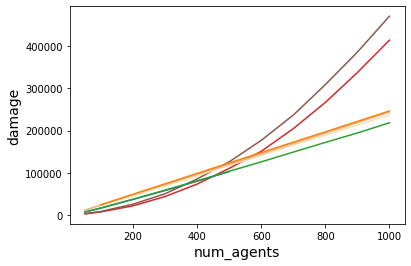

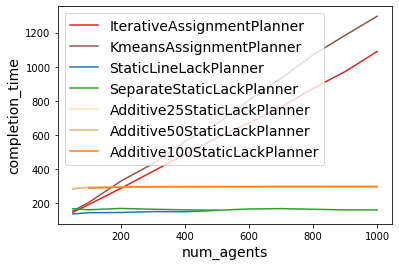

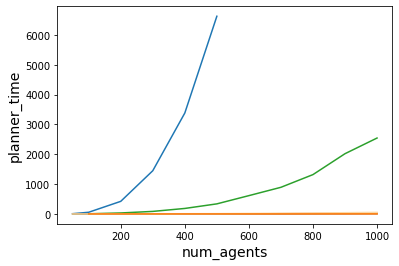

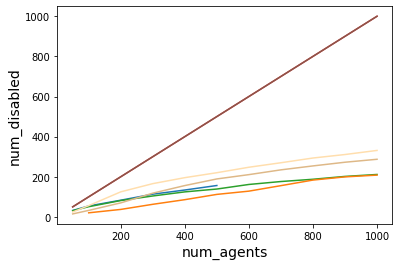

In [8]:
Y = ['damage', 'completion_time', 'planner_time', 'num_disabled']
X = ['num_agents' for y in Y]

for i in range(len(Y)):
    x = X[i]
    y = Y[i]

    plt.xlabel(x, fontsize=14)
    plt.ylabel(y, fontsize=14)

    for j in range(len(planners_results)):
        r = planners_results[j]
        plt.plot(list(r[x]),list(r[y]), c=colors[j])

    if i == 1:
        plt.legend(planners_names, fontsize='14')

    plt.savefig(f'./plots/{x}-{y}.png',bbox_inches='tight')
    plt.show()